In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
from equations2 import SWFull

In [18]:
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

<IPython.core.display.Javascript object>


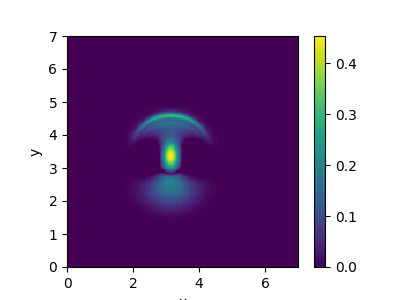

KeyboardInterrupt: 

In [19]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 7)
grid_y = field.UniformPeriodicGrid(resolution, 7)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

BT = 0*x + 0.1
IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*8 )

h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)
X = field.FieldSystem([u,v,h,H])
h.data[:] = IC
u.data[:] = 0*IC
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0
b = 0
alpha = 0.1

sw_problem = SWFull(X, 2, g, f, b, nu)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 1 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        pcm.set_clim([0,np.max(h.data)])
        fig.canvas.draw()